# DATA1030 project

In [7]:
# read the data
import pandas as pd
import numpy  as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
# Let's load the data
df = pd.read_csv('bank-additional/bank-additional.csv',sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.shape

(4119, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [75]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [76]:
duplicate = df.duplicated()
print(duplicate.sum())

0


# EDA

## Target Variable Y (deposite)

In [77]:
print(df['y'].value_counts())

no     3668
yes     451
Name: y, dtype: int64


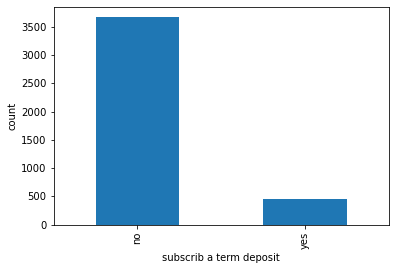

In [78]:
pd.value_counts(df['y']).plot.bar()
plt.ylabel('count')
plt.xlabel('subscrib a term deposit')
plt.show()

In [5]:
import seaborn as sns

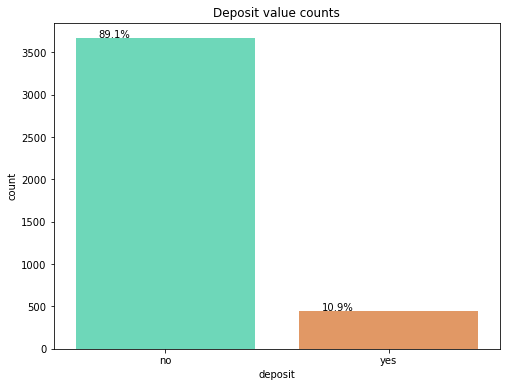

In [81]:
plt.figure(figsize=(8,6))
Y = df["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df,palette=['#5de8c1',"#f59451"])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
#ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
#ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.title("Deposit value counts")
plt.xlabel("deposit")
plt.savefig("figures/deposit.png",dpi=300)
plt.show()


## Categorical variables

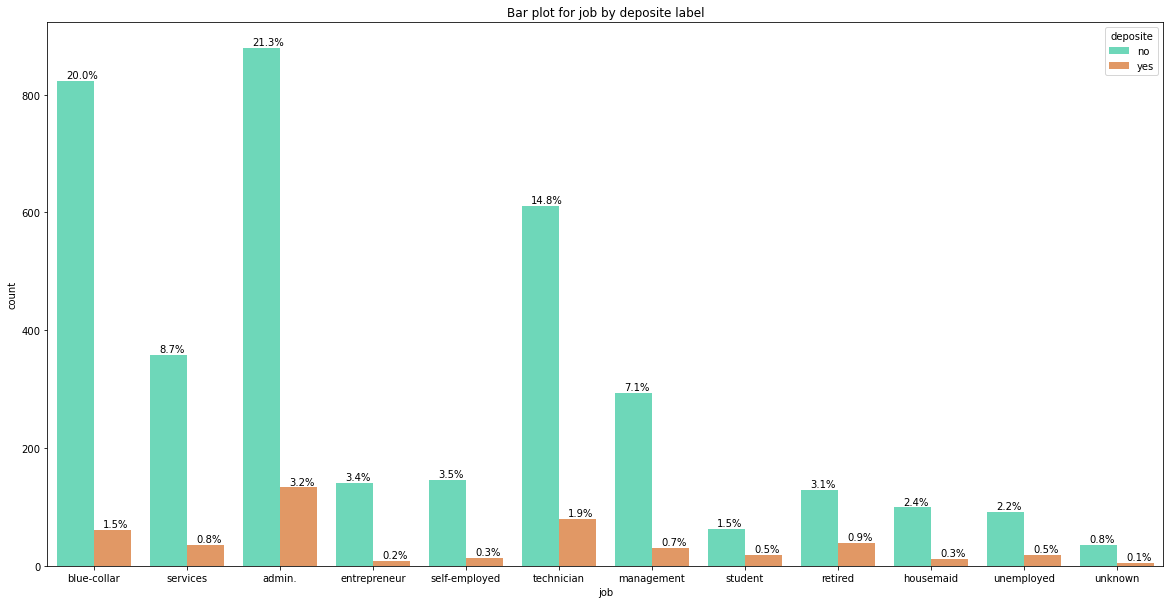

In [15]:
plt.figure(figsize=(20,10))
Y = df['job']
total = len(Y)*1.
ax=sns.countplot(x='job', data=df, hue="y",palette=['#5de8c1',"#f59451"])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(title='deposite', loc='upper right')
plt.title("Bar plot for job by deposite label")
plt.show()

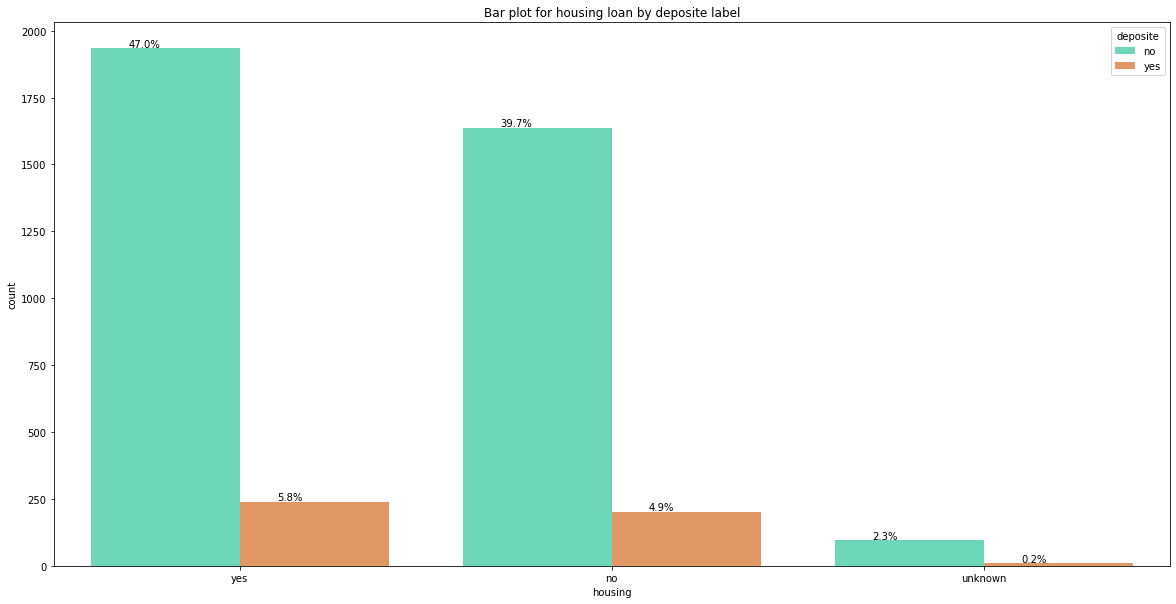

In [16]:
plt.figure(figsize=(20,10))
Y = df['housing']
total = len(Y)*1.
ax=sns.countplot(x='housing', data=df, hue="y",palette=['#5de8c1',"#f59451"])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(title='deposite', loc='upper right')
plt.title("Bar plot for housing loan by deposite label")
plt.show()

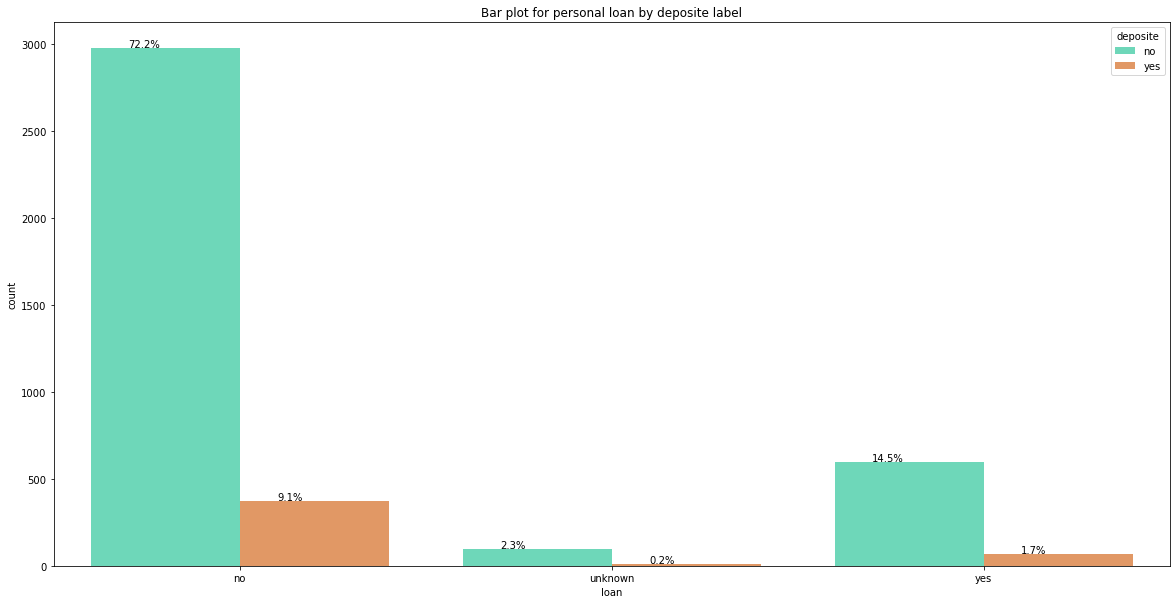

In [17]:
plt.figure(figsize=(20,10))
Y = df['loan']
total = len(Y)*1.
ax=sns.countplot(x='loan', data=df, hue="y",palette=['#5de8c1',"#f59451"])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(title='deposite', loc='upper right')
plt.title("Bar plot for personal loan by deposite label")
plt.show()

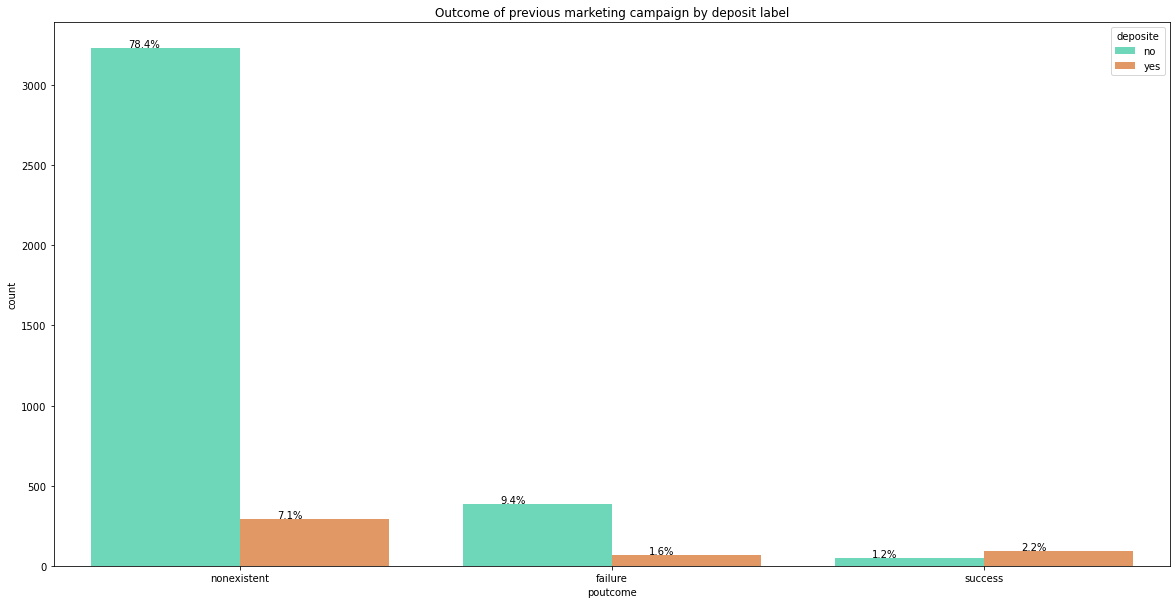

In [84]:
plt.figure(figsize=(20,10))
Y = df['poutcome']
total = len(Y)*1.
ax=sns.countplot(x='poutcome', data=df, hue="y",palette=['#5de8c1',"#f59451"])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(title='deposite', loc='upper right')
plt.title("Outcome of previous marketing campaign by deposit label")
plt.savefig("figures/barplot_poutcome_deposit.png",dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

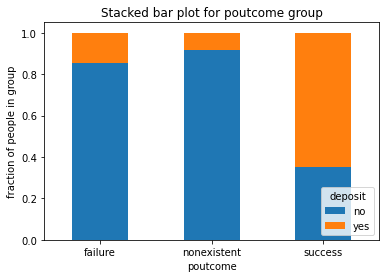

In [8]:
plt.figure(figsize=(8,6))
count_matrix = df.groupby(['poutcome', 'y']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.xlabel('poutcome')
plt.xticks( rotation='horizontal')
plt.ylabel('fraction of people in group')
plt.title('Stacked bar plot for poutcome group')
plt.legend(loc=4,title='deposit')
plt.savefig("figures/stacked_barplot_poutcome_deposit.png",dpi=300)
plt.show()

For most of the customers, the previous marketing campaign outcome does not exists. It means that most of the customers are new customers who have not been contacted earlier. Also one thing to note here that, for the customers who had a successful outcome from the previous campaign, majority of those customers did subscribe for a term deposit. As it has the class distribution of 2.2% for positive class, and 1.2% for negative class. From this, we can make an assumption, that this feature may hold some value in predicting the target variable. specially poutcome_success category.

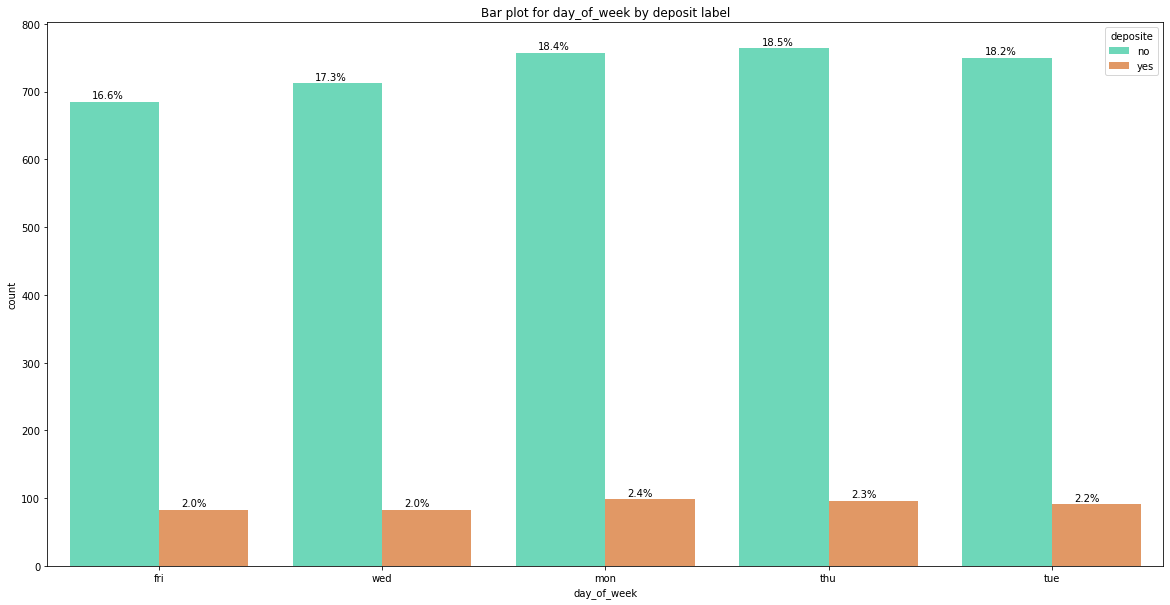

In [87]:
plt.figure(figsize=(20,10))
Y = df['day_of_week']
total = len(Y)*1.
ax=sns.countplot(x='day_of_week', data=df, hue="y",palette=['#5de8c1',"#f59451"])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(title='deposite', loc='upper right')
plt.title("Bar plot for day_of_week by deposit label")
plt.savefig("figures/barplot_dayweek_deposit.png",dpi=300)
plt.show()

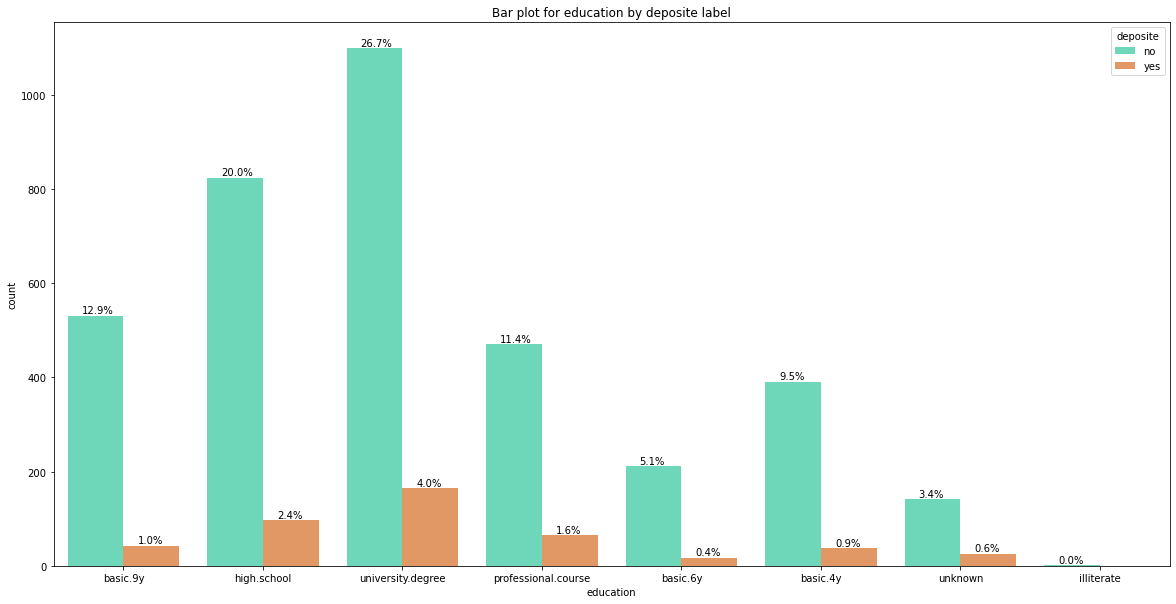

In [20]:
plt.figure(figsize=(20,10))
Y = df['education']
total = len(Y)*1.
ax=sns.countplot(x='education', data=df, hue="y",palette=['#5de8c1',"#f59451"])
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

plt.legend(title='deposite', loc='upper right')
plt.title("Bar plot for education by deposite label")
plt.show()

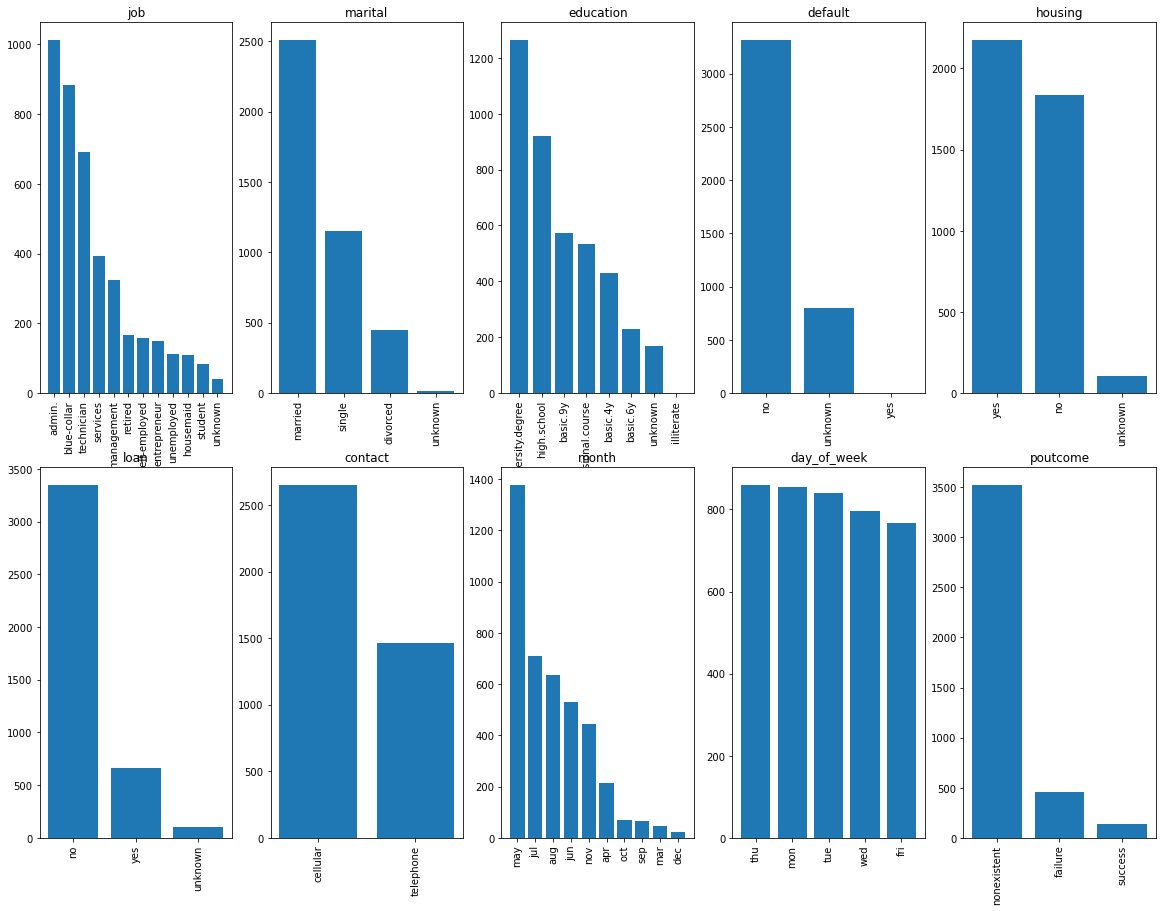

In [152]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week','poutcome']
fig, axs = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter //5
    trace_y = counter % 5
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

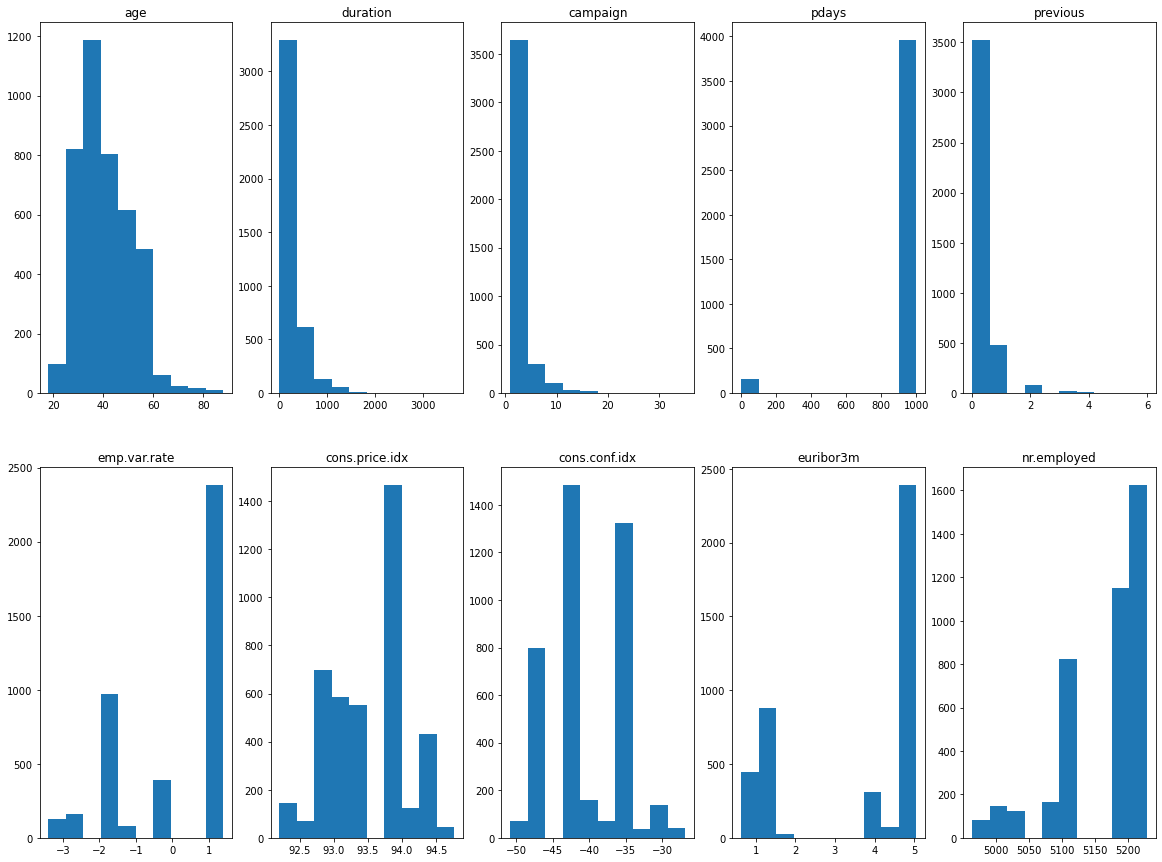

In [153]:
num_columns = ['age','duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m','nr.employed']

fig, axs = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 5
    trace_y = counter % 5
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [38]:
plt.rcParams["figure.figsize"] = (8,6)

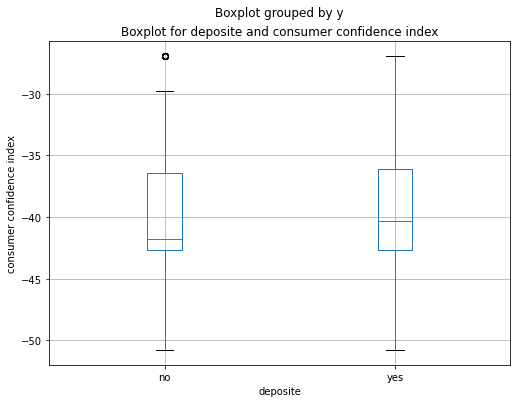

In [156]:
df[['cons.conf.idx','y']].boxplot(by='y')
plt.ylabel('consumer confidence index')
plt.xlabel('deposite')
plt.title('Boxplot for deposite and consumer confidence index')
plt.show()

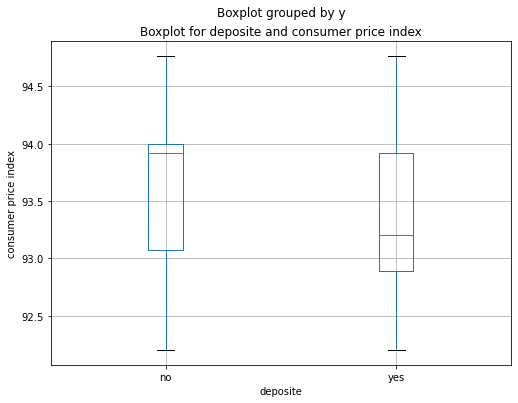

In [161]:
df[['cons.price.idx','y']].boxplot(by='y')
plt.ylabel('consumer price index')
plt.xlabel('deposite')
plt.title('Boxplot for deposite and consumer price index')
plt.show()

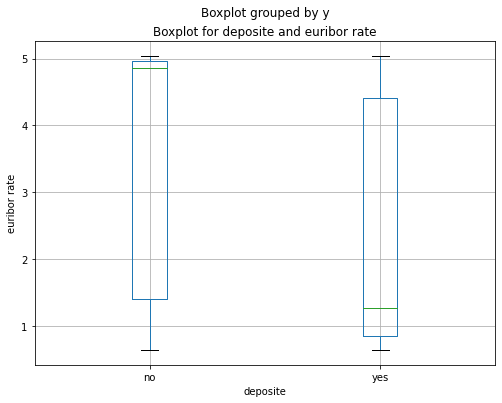

In [134]:
df[['euribor3m','y']].boxplot(by='y')
plt.ylabel('euribor rate')
plt.xlabel('deposite')
plt.title('Boxplot for deposite and euribor rate')
plt.show()

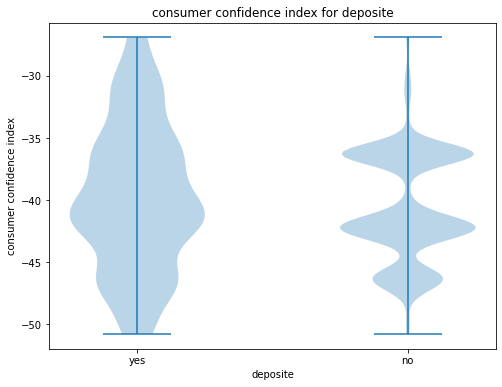

In [166]:
dataset = [df[df['y']=='yes']['cons.conf.idx'].values,
           df[df['y']=='no']['cons.conf.idx'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.xlabel('deposite')
plt.ylabel('consumer confidence index')
plt.title('consumer confidence index for deposite')
plt.show()

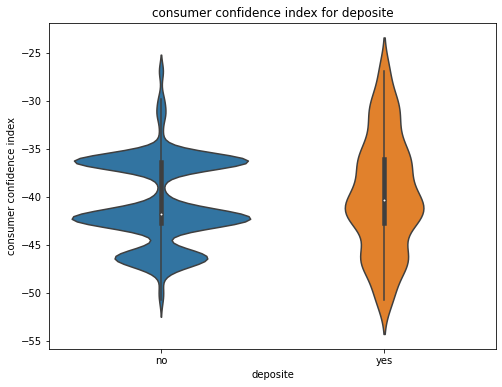

In [169]:
ax = sns.violinplot(x="y", y="cons.conf.idx", data=df)
plt.xlabel('deposite')
plt.ylabel('consumer confidence index')
plt.title('consumer confidence index for deposite')
plt.show()

Using violin plots to compare two data sets. Violin plots representing two data sets are shown. A violin plot is a powerful data visualization technique when used for comparing two data sets. This is because it allows the center, spread, and distribution of the data sets to be compared. In this case, we can see that data set A has a median and IQR that are smaller than that of data set B. We can also see that data set B has one mode, whereas data set A has two modes. This could be a clue that data set A includes two subpopulations: one subpopulation of data points that resemble those in data set B, and a subpopulation of data points that are distinct from those in data set B.

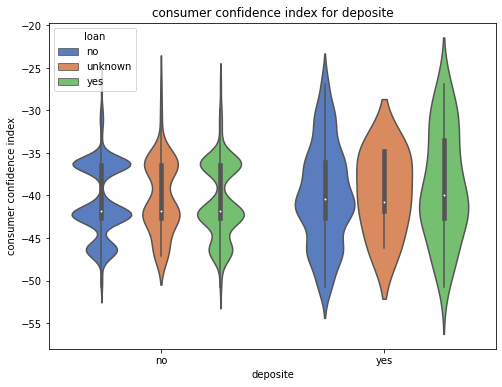

In [177]:
ax = sns.violinplot(x="y", y="cons.conf.idx", hue="loan",data=df, palette="muted")
plt.xlabel('deposite')
plt.ylabel('consumer confidence index')
plt.title('consumer confidence index for deposite')
plt.show()

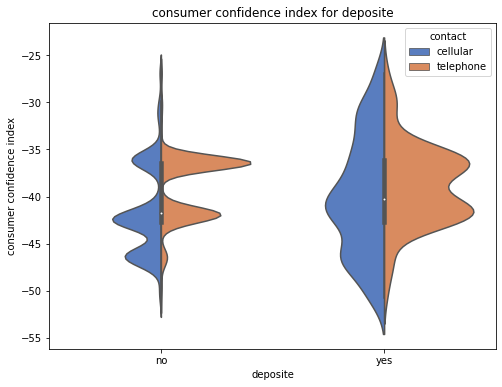

In [176]:
ax = sns.violinplot(x="y", y="cons.conf.idx", hue="contact",data=df, palette="muted", split=True)
plt.xlabel('deposite')
plt.ylabel('consumer confidence index')
plt.title('consumer confidence index for deposite')
plt.show()

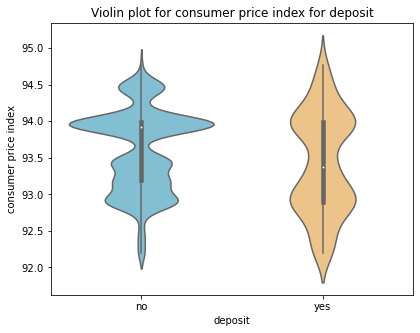

In [106]:
ax = sns.violinplot(x="y", y="cons.price.idx", data=df,palette=['#75c6e0',"#fcc779"])
plt.xlabel('deposit')
plt.ylabel('consumer price index')
plt.title('Violin plot for consumer price index for deposit')
plt.savefig("figures/violin__cpi_deposit.png",dpi=300)
plt.show()

Using violin plots to compare two data sets. Violin plots representing two data sets are shown. A violin plot is a powerful data visualization technique when used for comparing two data sets. This is because it allows the center, spread, and distribution of the data sets to be compared. In this case, we can see that data set A has a median and IQR that are smaller than that of data set B. We can also see that data set B has one mode, whereas data set A has two modes. This could be a clue that data set A includes two subpopulations: one subpopulation of data points that resemble those in data set B, and a subpopulation of data points that are distinct from those in data set B.

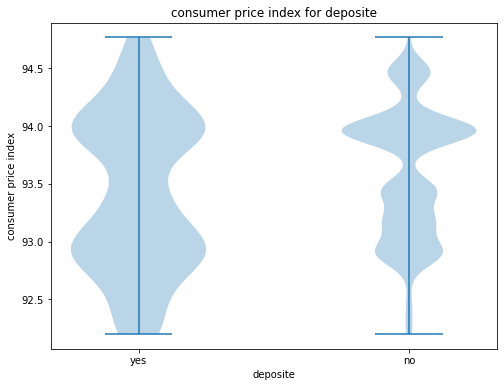

In [165]:
dataset = [df[df['y']=='yes']['cons.price.idx'].values,
           df[df['y']=='no']['cons.price.idx'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['yes','no'])
plt.xlabel('deposite')
plt.ylabel('consumer price index')
plt.title('consumer price index for deposite')
plt.show()

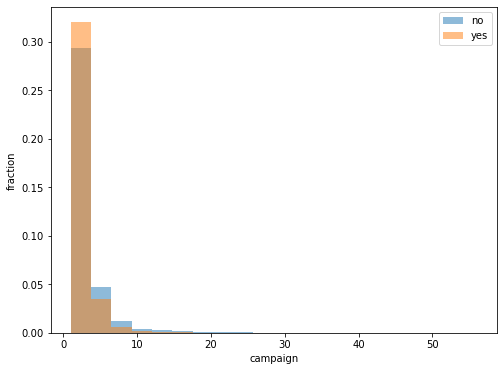

In [136]:
import matplotlib
from matplotlib import pylab as plt

categories = df['y'].unique()
bin_range = (df['campaign'].min(),df['campaign'].max())

for c in categories:
    plt.hist(df[df['y']==c]['campaign'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('campaign')
plt.show()

## Continous Varibales

### Age

In [11]:
import seaborn as sns

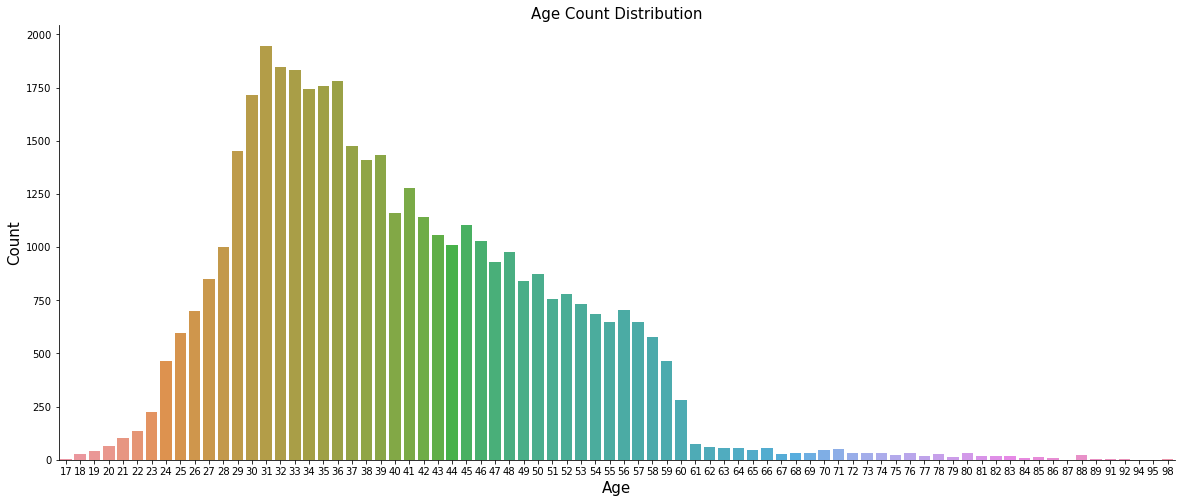

In [138]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

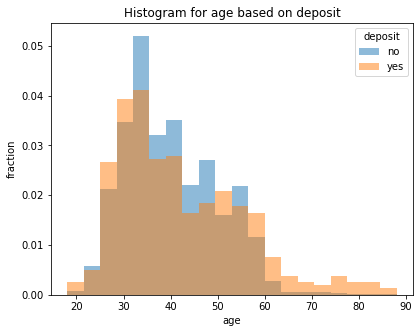

In [107]:
import matplotlib
from matplotlib import pylab as plt

categories = df['y'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['y']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend(title='deposit')
plt.ylabel('fraction')
plt.xlabel('age')
plt.title('Histogram for age based on deposit')
plt.savefig("figures/hist_age_deposit.png",dpi=300)
plt.show()

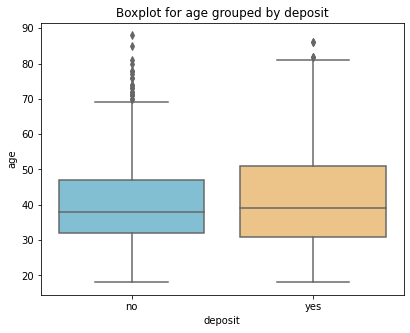

In [108]:
sns.boxplot(data=df,x='y',y="age",palette=['#75c6e0',"#fcc779"])
plt.xlabel('deposit')
plt.ylabel('age')
plt.title('Boxplot for age grouped by deposit')
plt.savefig("figures/boxplot_age_deposit.png",dpi=300)
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. And the boxplot for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

/Users/qingyan/opt/anaconda3/envs/data1030/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

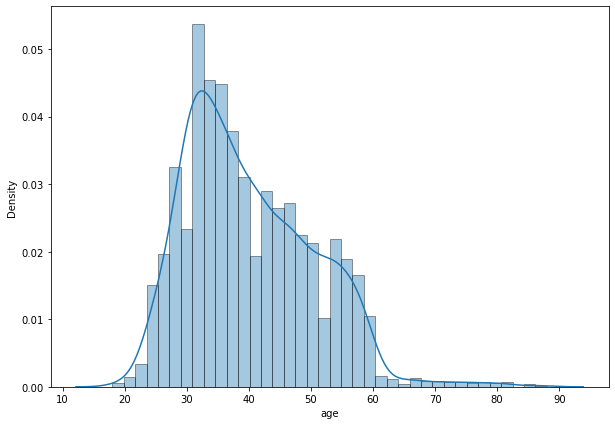

In [39]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'], kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

In [40]:
print('Age of the oldest person:', df['age'].max(), 'Years')
print('Age of the youngest person:', df['age'].min(), 'Years')
print('Average age in dataset:', df['age'].mean(), 'Years')

Age of the oldest person: 88 Years
Age of the youngest person: 18 Years
Average age in dataset: 40.11361981063365 Years


### duration

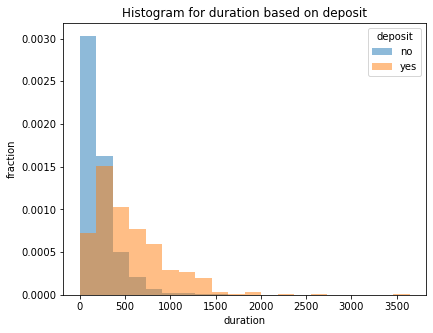

In [9]:
plt.rcParams["figure.figsize"] = (6.5,5)
categories = df['y'].unique()
bin_range = (df['duration'].min(),df['duration'].max())


for c in categories:
    plt.hist(df[df['y']==c]['duration'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend(title='deposit')
plt.ylabel('fraction')
plt.xlabel('duration')
plt.title('Histogram for duration based on deposit')
plt.savefig("figures/hist_duration_deposit.png",dpi=300)
plt.show()

/Users/qingyan/opt/anaconda3/envs/data1030/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


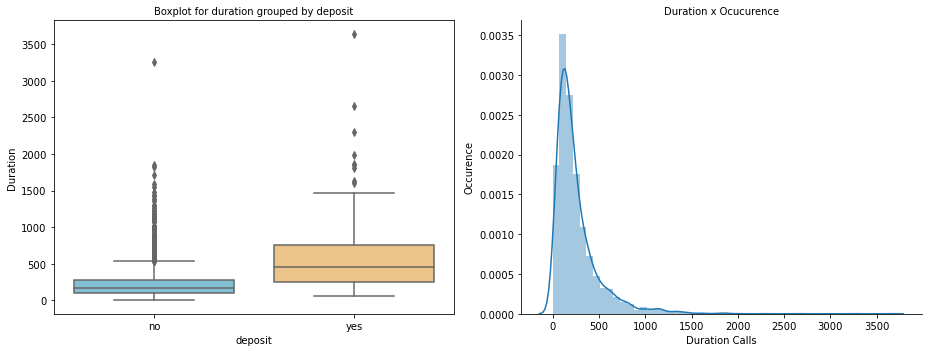

In [90]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))




sns.boxplot(data = df, x='y',y='duration',palette=['#75c6e0',"#fcc779"], ax = ax1)
ax1.set_xlabel('deposit', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Boxplot for duration grouped by deposit', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/box_density_duration_deposit.png",dpi=300)
plt.tight_layout() 

Now this feature is very interesting in our case study. It denotes the duration of the last contact, in seconds. It is mentioned in the source of the dataset.

So with this we know that this feature will be very interesting xD. And we also know that we will not be able to include this feature in our final models, as obviously we want to create a realistic predictive model that can be used by the business. But, we will surely implement a basic model with the duration feature just to see how much of an impact this feature makes. So with that, let’s look into the box plot and pdf of this feature.

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

### emp.var.rate
### nr.employed

In [ ]:
ax = sns.violinplot(x="y", y="cons.conf.idx", data=df)
plt.xlabel('deposite')
plt.ylabel('consumer confidence index')
plt.title('consumer confidence index for deposite')
plt.show()

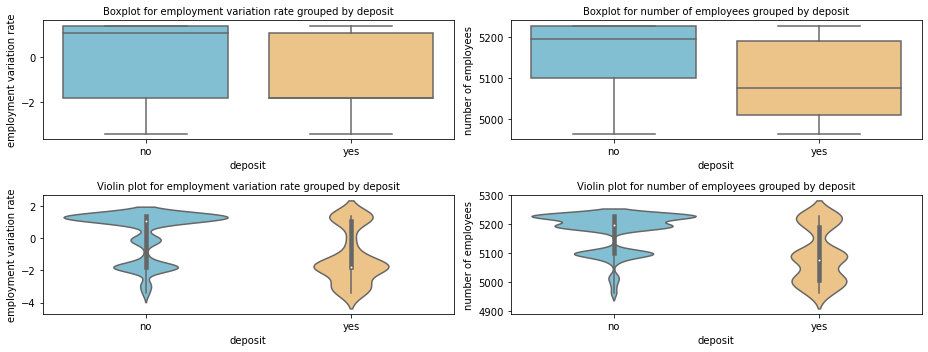

In [92]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 5))

sns.boxplot(data = df, x='y',y='emp.var.rate',palette=['#75c6e0',"#fcc779"], ax = ax1)
ax1.set_xlabel('deposit', fontsize=10)
ax1.set_ylabel('employment variation rate', fontsize=10)
ax1.set_title('Boxplot for employment variation rate grouped by deposit', fontsize=10)
ax1.tick_params(labelsize=10)

sns.boxplot(data = df, x='y',y='nr.employed',palette=['#75c6e0',"#fcc779"], ax = ax2)
ax2.set_xlabel('deposit', fontsize=10)
ax2.set_ylabel('number of employees', fontsize=10)
ax2.set_title('Boxplot for number of employees grouped by deposit', fontsize=10)
ax2.tick_params(labelsize=10)

ax = sns.violinplot(x="y", y="emp.var.rate", data=df, palette=['#75c6e0',"#fcc779"],ax = ax3)
ax3.set_xlabel('deposit', fontsize=10)
ax3.set_ylabel('employment variation rate', fontsize=10)
ax3.set_title('Violin plot for employment variation rate grouped by deposit', fontsize=10)
ax3.tick_params(labelsize=10)


ax = sns.violinplot(x="y", y="nr.employed", data=df, palette=['#75c6e0',"#fcc779"],ax = ax4)
ax4.set_xlabel('deposit', fontsize=10)
ax4.set_ylabel('number of employees', fontsize=10)
ax4.set_title('Violin plot for number of employees grouped by deposit', fontsize=10)
ax4.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/fourplots__employ_deposit.png",dpi=300)
plt.tight_layout() 

/Users/qingyan/opt/anaconda3/envs/data1030/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qingyan/opt/anaconda3/envs/data1030/lib/python3.9/site-packages/seaborn/distributions.py:2112: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


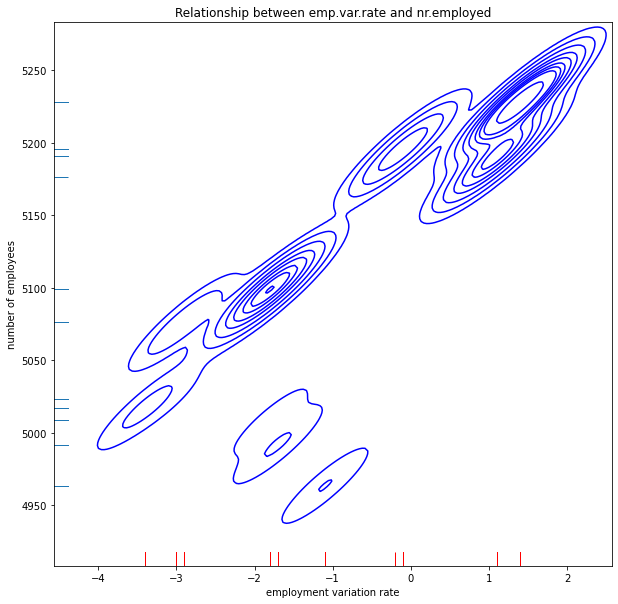

In [103]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df['emp.var.rate'], df['nr.employed'], color="b", ax=ax)
sns.rugplot(df['emp.var.rate'], color="r", ax=ax)
sns.rugplot(df['nr.employed'], vertical=True, ax=ax)
plt.xlabel('employment variation rate')
plt.ylabel('number of employees')
plt.title('Relationship between emp.var.rate and nr.employed')
plt.savefig("figures/relate_employ.png",dpi=300)
plt.show()

### euribor3m

From the above plot, we can clearly see the difference in median for both the classes. This indicates that the feature can be very useful for our case study. But we can validate the assumption only by applying models and extracting feature importance.

/Users/qingyan/opt/anaconda3/envs/data1030/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


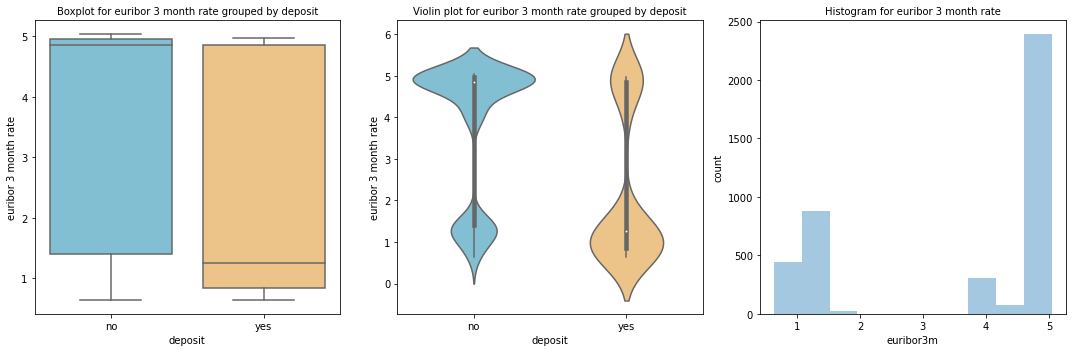

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

sns.boxplot(data = df, x='y',y='euribor3m',palette=['#75c6e0',"#fcc779"], ax = ax1)
ax1.set_xlabel('deposit', fontsize=10)
ax1.set_ylabel('euribor 3 month rate', fontsize=10)
ax1.set_title('Boxplot for euribor 3 month rate grouped by deposit', fontsize=10)
ax1.tick_params(labelsize=10)

ax = sns.violinplot(x="y", y="euribor3m", data=df, palette=['#75c6e0',"#fcc779"],ax = ax2)
ax2.set_xlabel('deposit', fontsize=10)
ax2.set_ylabel('euribor 3 month rate', fontsize=10)
ax2.set_title('Violin plot for euribor 3 month rate grouped by deposit', fontsize=10)
ax2.tick_params(labelsize=10)

ax = sns.distplot(df['euribor3m'] ,kde=False,ax = ax3)
ax3.set_xlabel('euribor3m', fontsize=10)
ax3.set_ylabel('count', fontsize=10)
ax3.set_title('Histogram for euribor 3 month rate', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/threeplots__euribor_deposit.png",dpi=300)
plt.tight_layout() 

## Data preprocessing

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Text(0.5, 1.05, 'Pearson correlation of Features')

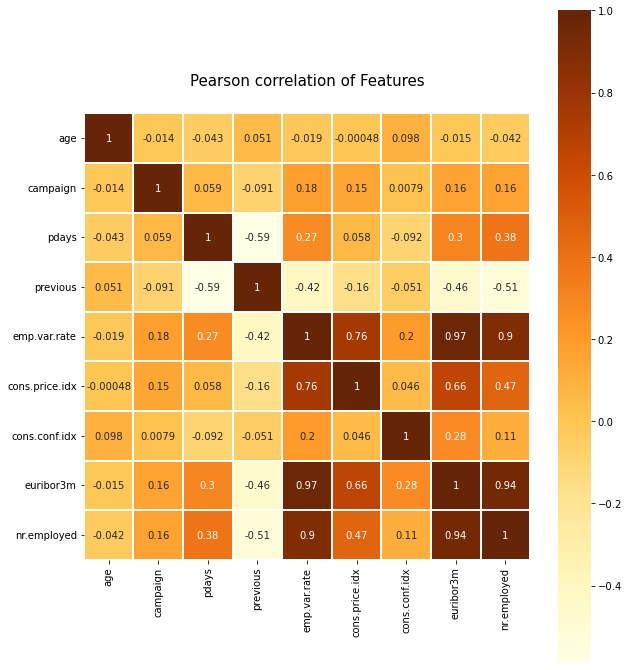

In [20]:
%matplotlib inline
corr = X.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlOrBr", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [12]:
# extract X, y, variable 'y' is the target variable.
y = df['y']
# X need to drop duration column
X = df.drop(['duration', 'y'], axis=1)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


In [6]:
from sklearn.model_selection import train_test_split, GroupShuffleSplit, GroupKFold, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder

In [13]:
# assign a random state = 42
random_state = 42

# ordinal feature
ordinal_ftrs = ['education'] # if you have more than one ordinal feature, add the feature names here
ordinal_cats = [['illiterate','basic.4y','basic.6y', 'basic.9y', 'high.school','professional.course','university.degree','unknown']]

# all unordered categorical features first
onehot_ftrs = ['job','marital','default','housing','loan','contact','month','day_of_week','poutcome']

# all continous features
con_ftrs = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']


# I plan to stratify by multiple columns with no duplicates ('Class' and 'User'), 
# so I create a new column that is a concatenation of the values in my other columns and stratify on the new column.
# set strata reference as class & user id


X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
# get stratified reference for kfold
df_stratify_kfold = y.iloc[X_other.index]
# initilize the StratifiedKFold, I choose 5 folds.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
# create a dictionary for kfold (other) and test data
stratify__kfold_split = {'kfold_train':[], 'kfold_val':[], 'test': []}
# do StratifiedKFold split on other
for train_index, val_index in skf.split(X_other, df_stratify_kfold):
    # extract X_train, X_train, y_val, y_val
    X_train, X_val = X_other.iloc[train_index], X_other.iloc[val_index]
    y_train, y_val = y_other.iloc[train_index], y_other.iloc[val_index]
    
    # initialize Ordinal encoding
    oenc = OrdinalEncoder(categories = ordinal_cats)
    #  fit the training data
    oenc.fit(X_train[ordinal_ftrs])
    # fit transform to train, val and test
    X_train_ordinal = oenc.transform(X_train[ordinal_ftrs])
    X_val_ordinal = oenc.transform(X_val[ordinal_ftrs])
    X_test_ordinal = oenc.transform(X_test[ordinal_ftrs])
    
    # initialize One hot encoding
    ohenc = OneHotEncoder(sparse=False,handle_unknown='ignore')
    
    # One-hot-encoder for one-hot variables
    X_train_ohe = ohenc.fit_transform(X_train[onehot_ftrs])
    X_val_ohe = ohenc.transform(X_val[onehot_ftrs])
    X_test_ohe = ohenc.transform(X_test[onehot_ftrs])
    
    # initialize StandardScaler for all X columns
    ss = StandardScaler()
    # fit_transform on train
    X_train_scaler = ss.fit_transform(X_train[con_ftrs])
    # transform val and test
    X_val_scaler = ss.transform(X_val[con_ftrs])
    X_test_scaler = ss.transform(X_test[con_ftrs])
    
    # We need to use concatenate function to concat the preprocesses variables together for train, validation and test sets.
    X_train_concat = np.concatenate([X_train_ordinal, X_train_ohe, X_train_scaler], axis=1)
    X_val_concat = np.concatenate([X_val_ordinal, X_val_ohe, X_val_scaler], axis=1)
    X_test_concat = np.concatenate([X_test_ordinal, X_test_ohe, X_test_scaler], axis=1)
    
    # We can get the resulted preprocessed sets
    X_pre_col = ordinal_ftrs+list(ohenc.get_feature_names(onehot_ftrs)) + con_ftrs
    X_pre_train = pd.DataFrame(X_train_concat, columns=X_pre_col)
    X_pre_val = pd.DataFrame(X_val_concat, columns=X_pre_col)
    X_pre_test = pd.DataFrame(X_test_concat, columns=X_pre_col)
    
    # save to temp dict
    #stratify__kfold_split['kfold_train'].append([X_train_concat, y_train])
    #stratify__kfold_split['kfold_val'].append([X_train_concat, y_val])
#stratify__kfold_split['test'] = [X_test_concat, y_test]
# Use print function to check the reproducability. We can rerun this cell multiple times and find the results are the same.
#print('X_train after preprocessing: ', X_train_concat[0:5], sep='\n')
#print('X_val after preprocessing: ', X_val_concat[0:5], sep='\n')
#print('X_test after preprocessing: ',X_test_concat[0:5], sep='\n')
#print('Y_train: ', y_train.iloc[0:5], sep='\n')
#print('Y_test: ', y_test.iloc[0:5], sep='\n')

#print('Training set after preprocessed: ', X_pre_train.head(), sep='\n')
#print('Validation set after preprocessed: ', X_pre_val.head(), sep='\n')
#print('Test set after preprocessed: ', X_pre_test.head(), sep='\n')
X_pre_train.head()

,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.741005,0.176254,0.200629,-0.361394,-1.187514,-1.171792,-1.249231,-1.332726,-0.900383
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.613900,-0.203947,0.200629,1.488382,-1.187514,-1.171792,-1.249231,-1.302191,-0.900383
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.644226,-0.584149,0.200629,-0.361394,-1.187514,-1.171792,-1.249231,-1.307952,-0.900383
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.031342,0.176254,0.200629,-0.361394,0.853922,-0.221548,0.939453,0.782853,0.847253
4,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.097795,-0.584149,0.200629,-0.361394,-1.187514,-1.171792,-1.249231,-1.338488,-0.900383


In [21]:
X_pre_train.shape

(2636, 55)

## TSNE plots

visualise the high dimensional data in 2D. even though there seems to be a lot of overlap in the data, there seems to be some distinction between the two classes.

In [47]:
from matplotlib.colors import ListedColormap

In [34]:
y_train.replace({'no':0, 'yes':1}, inplace=True)
y_val.replace({'no':0, 'yes':1}, inplace=True)
y_test.replace({'no':0, 'yes':1}, inplace=True)

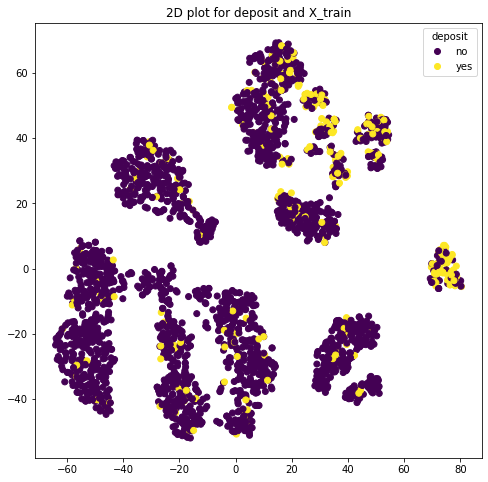

In [110]:
# TSNE plot
model = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = model.fit_transform(X_pre_train)
plt.figure(figsize=(8,8))
classes = ['no','yes']
#colours = ListedColormap(['PRGn', 'Oranges_r'])
scatter = plt.scatter(tsne_data[:,0],tsne_data[:,1],c=y_train.values,cmap='viridis',alpha=1)
plt.legend(handles=scatter.legend_elements()[0],title="deposit",labels=classes)
plt.title('2D plot for deposit and X_train')
plt.savefig("figures/2D_deposit_X_train.png",dpi=300)
plt.show()

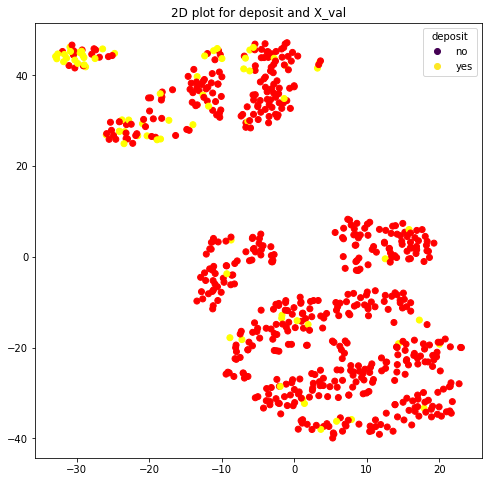

In [114]:
# TSNE plot
model = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = model.fit_transform(X_pre_val)
plt.figure(figsize=(8,8))
classes = ['no','yes']
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=y_val.values,cmap='vi',alpha=1)
plt.legend(handles=scatter.legend_elements()[0],title="deposit",labels=classes)
plt.title('2D plot for deposit and X_val')
plt.savefig("figures/2D_deposit_X_val.png",dpi=300)
plt.show()

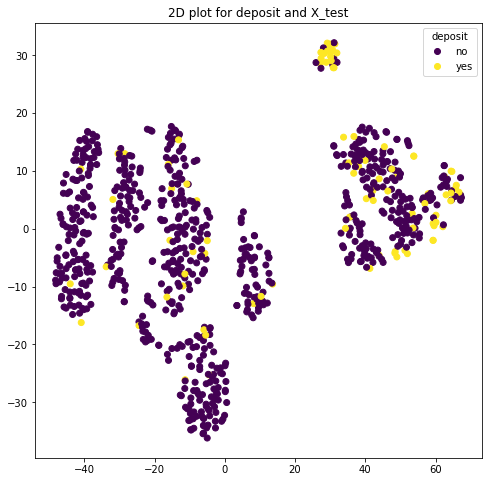

In [112]:
# TSNE plot
model = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = model.fit_transform(X_pre_test)
plt.figure(figsize=(8,8))
classes = ['no','yes']
plt.scatter(tsne_data[:,0],tsne_data[:,1],c=y_test.values,cmap='viridis',alpha=1)
plt.legend(handles=scatter.legend_elements()[0],title="deposit",labels=classes)

plt.title('2D plot for deposit and X_test')
plt.savefig("figures/2D_deposit_X_test.png",dpi=300)
plt.show()